In [2]:
#soru_1
#Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
states = pd.read_csv('C:\\Users\\PC\\Desktop\\states_all.csv', index_col=0)
states.describe()
states.isnull().sum()*100/states.shape[0]

STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64.276139
AVG_READING_8_SCORE             66

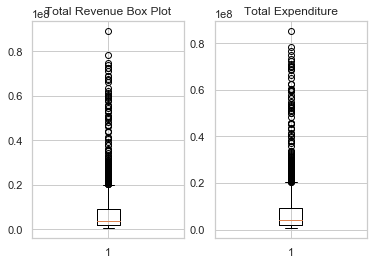

In [4]:
#toplam harcama ve toplam harcama verilerini enterpolasyonla dolduralım ve aykırı değerlerine bakalım.
Totalrint= states['TOTAL_REVENUE'].interpolate()
Totalexint= states['TOTAL_EXPENDITURE'].interpolate()
plt.subplot(1,2,1)
plt.boxplot(Totalrint)
plt.title('Total Revenue Box Plot')

plt.subplot(1,2,2)
plt.boxplot(Totalexint)
plt.title('Total Expenditure')
plt.show()     #Her iki değişkende de aykırı değer vardır.

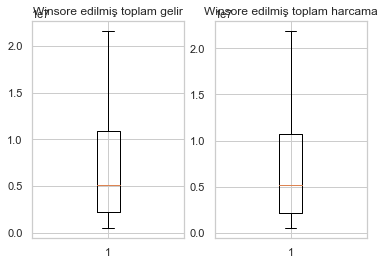

In [5]:
# TOTAL_REVENUE ve TOTAL_EXPENDITURE değişkenlerini winsorize yöntemi ile aykırı değerlerini ortadan kaldıralım. 

winsorize_totalre = winsorize(states["TOTAL_REVENUE"].dropna(), (0, 0.10))
winsorize_totalex= winsorize(states["TOTAL_EXPENDITURE"].dropna(), (0, 0.10))
plt.subplot(1,2,1)
plt.boxplot(winsorize_totalre)
plt.title('Winsore edilmiş toplam gelir')

plt.subplot(1,2,2)
plt.boxplot(winsorize_totalex)
plt.title('Winsore edilmiş toplam harcama')
plt.show()   # Aykırı değerleri ortadan kaldırdık.

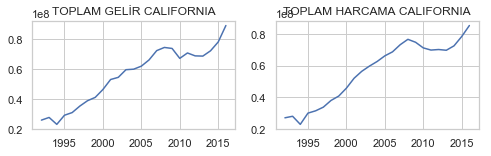

In [26]:
#soru_2
#Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. 
#Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

plt.figure(figsize=(8,2))
st_california = states[states['STATE']=='CALIFORNIA']
plt.subplot(1,2,1)
plt.plot(st_california['YEAR'], st_california['TOTAL_REVENUE'])
plt.title('TOPLAM GELİR CALIFORNIA')

plt.subplot(1,2,2)
plt.plot(st_california['YEAR'], st_california['TOTAL_EXPENDITURE'])
plt.title('TOPLAM HARCAMA CALIFORNIA')
plt.show() #toplam gelir ve harcama yıllara göre değişim göstermekte ve en yüksek olduğu yıl 2015 'tir.

In [32]:
#soru_3
#Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?
#AVG değerleri eksik veri fazlaydı.Önce AVG değerlerini enterpolasyonla dolduralım. sonra 
st_california[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']] = st_california[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].interpolate()
st_california[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].head()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,
1992_CALIFORNIA,1992,208.398961,260.892247,196.764414,NaN
1993_CALIFORNIA,1993,208.581491,261.362305,198.051458,NaN
1994_CALIFORNIA,1994,208.764022,261.832363,199.338502,NaN
1995_CALIFORNIA,1995,208.946552,262.302421,200.625547,NaN
1996_CALIFORNIA,1996,209.129083,262.772478,201.912591,269.197451


In [31]:
# Kaliforniyada Matematik ve okuma derslerinin ortalamlarına bakalım

st_california[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].mean().head()

# Matematik ortalaması daha yüksek görünüyor.

AVG_MATH_4_SCORE       223.265888
AVG_MATH_8_SCORE       268.087255
AVG_READING_4_SCORE    206.932370
AVG_READING_8_SCORE    262.075874
dtype: float64

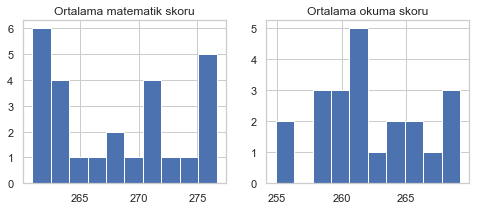

In [33]:
#soru_4
#Matematik ve okuma notlarının dağılımı nedir?
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(st_california['AVG_MATH_8_SCORE'])
plt.title('Ortalama matematik skoru')

plt.subplot(1,2,2)
plt.hist(st_california['AVG_READING_8_SCORE'])
plt.title('Ortalama okuma skoru')
plt.show()

In [36]:
#soru_5
#Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. 
#Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

#En yüksek skorları medyanla dolduralım
medyanreading = states[states['STATE'] == 'CALIFORNIA']['AVG_READING_8_SCORE'].fillna(states[states['STATE'] == 'CALIFORNIA']['AVG_READING_8_SCORE'].median())
medyanmat= states[states['STATE'] == 'CALIFORNIA']['AVG_MATH_8_SCORE'].fillna(states[states['STATE'] == 'CALIFORNIA']['AVG_MATH_8_SCORE'].median())

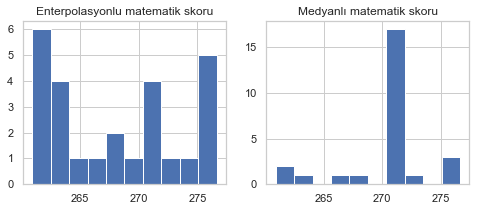

In [38]:
#enterpolasyon ve medyanla doldurmayı karşılaştıralım
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(st_california['AVG_MATH_8_SCORE'])
plt.title('Enterpolasyonlu matematik skoru')

plt.subplot(1,2,2)
plt.hist(medyanmat)
plt.title('Medyanlı matematik skoru')
plt.show()        # enterpolasyonlu doldurma daha çok normal dağılıma benzer.